# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Get the Data
**Read the 'KNN_Project_Data csv file into a dataframe**

In [4]:
df=pd.read_csv('KNN_Project_Data.csv')
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

**Check the head of the dataframe.**

In [6]:
df.head(5)

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

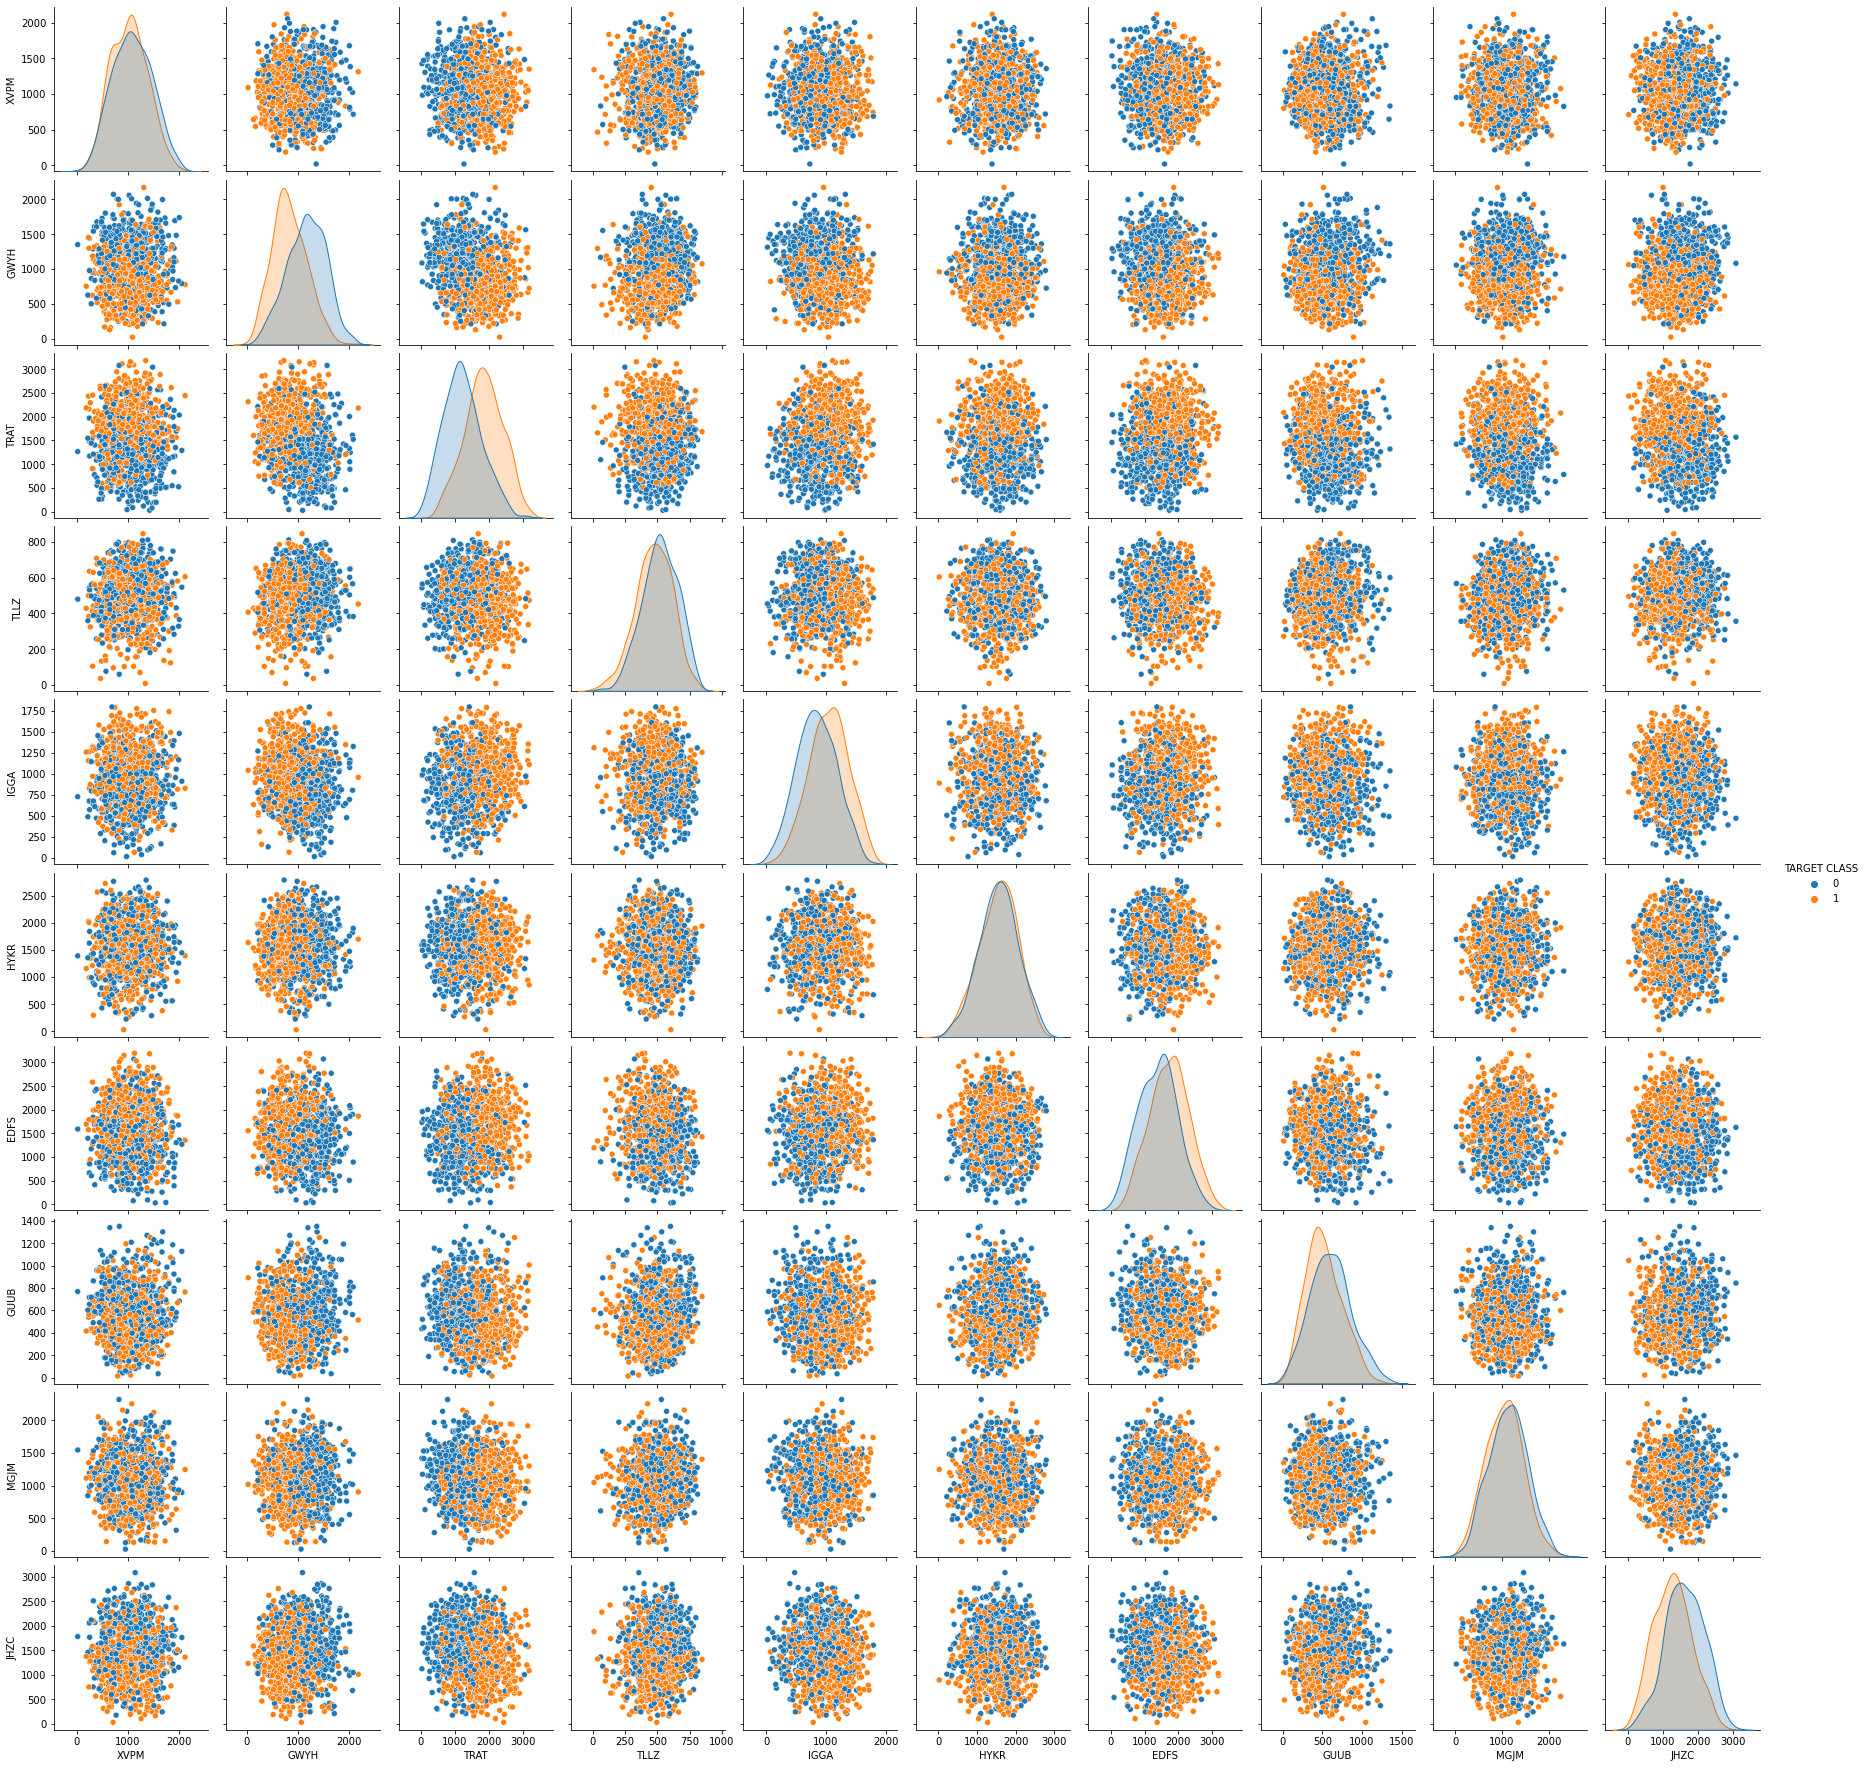

In [7]:
sns.pairplot(df,hue='TARGET CLASS')

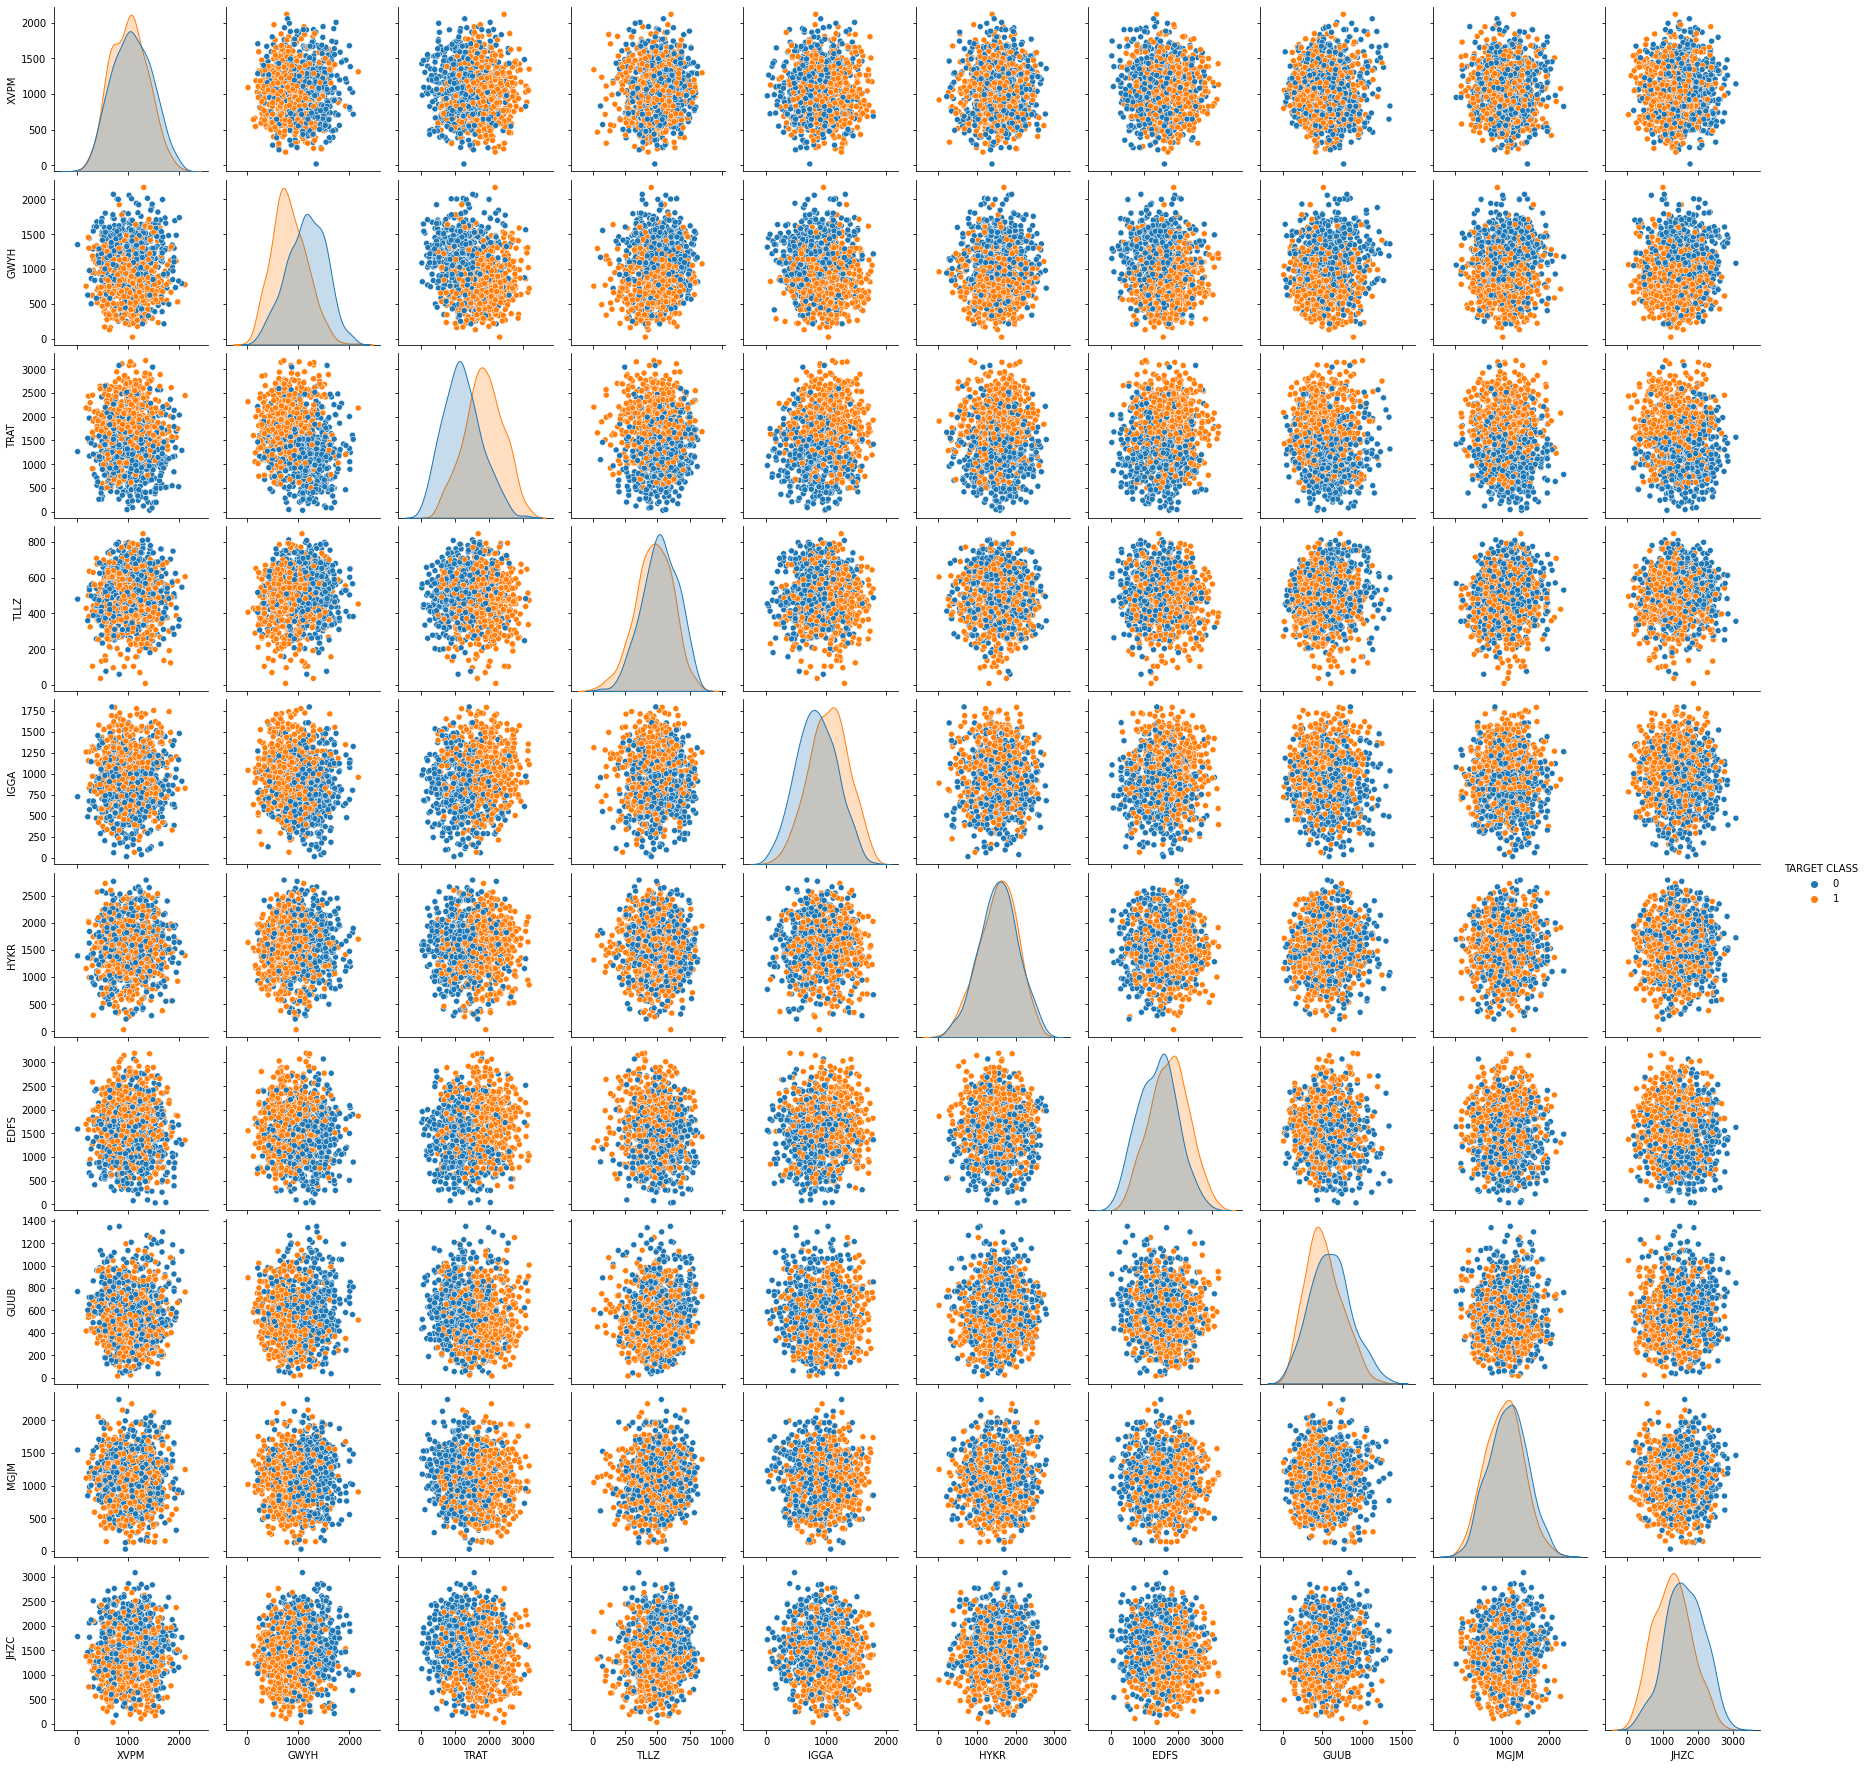

# Divide X & Y

In [8]:
 x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [10]:
from sklearn.preprocessing import StandardScaler

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [15]:
for col in df:
    sc=StandardScaler()
    df[col]=sc.fit_transform(df[[col]])

df.head(5)

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  TARGET CLASS  
0 -0.932794  1.008313 -1.069627          -1.0  
1 -0.461864  0.258321 -1.041546           1.0  
2  1.149298  2.184784  0.342811           1.0  
3 -0.888557  0.162310 -0.002793          -1.0  
4  0.391419 -1.365603  0.787762          -1.0

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [16]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [17]:
 from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [18]:
 knn=KNeighborsClassifier(n_neighbors=10)

**Fit this KNN model to the training data.**

In [19]:
knn.fit(xtrain,ytrain) 

KNeighborsClassifier(n_neighbors=10)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and Xtest.**

In [20]:
 ypred=knn.predict(xtest)


**Create a confusion matrix , Accuracy and classification report.**

In [21]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
ac = accuracy_score(ytest, ypred)
cr = classification_report(ytest, ypred)
print(confusion_matrix(ytest,ypred))
print(f"Accuracy -: {ac}")
print(f"\n {cr}")

[[106  19]
 [ 30  95]]
Accuracy -: 0.804

               precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.83      0.76      0.79       125

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250



Confusion Matrix:-
[[91 40]
 [25 94]]

Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       131
           1       0.70      0.79      0.74       119

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the accuracy for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [22]:
accuracy =[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ypred,ytest)
    accuracy.append(ac)
    
print(accuracy)

[0.736, 0.728, 0.784, 0.792, 0.796, 0.784, 0.808, 0.812, 0.82, 0.804, 0.832, 0.792, 0.812, 0.796, 0.796, 0.8, 0.792, 0.784, 0.772, 0.776, 0.776, 0.776, 0.784, 0.78, 0.784, 0.788, 0.8, 0.8, 0.796]


**Now create the following plot using the information from your for loop.**

Text(0.5, 1.0, 'Accuracy vs Rate')

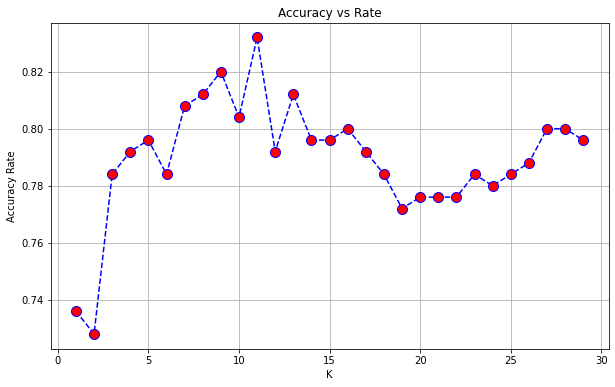

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy, color='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy vs Rate')

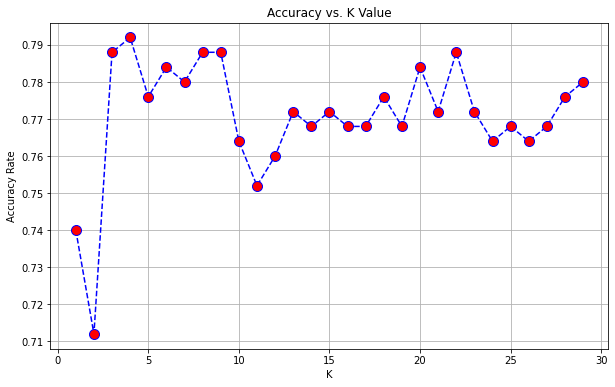

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

**Create the model again**

In [25]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

print(accuracy_score(ypred,ytest))

0.832


**Get the confusion matrix , accuracy score and classification report**

In [28]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
ac = accuracy_score(ytest, ypred)
cr = classification_report(ytest, ypred)
print(f'confusion matrix:-\n {confusion_matrix(ytest,ypred)}')
print(f"Accuracy -: {ac}")
print(f"\n {cr}")

confusion matrix:-
 [[102  23]
 [ 19 106]]
Accuracy -: 0.832

               precision    recall  f1-score   support

           0       0.84      0.82      0.83       125
           1       0.82      0.85      0.83       125

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250



Confusion Matrix:-
[[108  23]
 [ 29  90]]

Accuracy: 0.792
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       131
           1       0.80      0.76      0.78       119

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



**Get the Mean accuracy with cross val score**

In [31]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=10)
print(f'Accuracy: {cvs.mean()*100}\nstandard deviation : {cvs.std()*100}')

Accuracy: 80.5
standard deviation : 3.201562118716423


Accuracy: 80.254592
Standard Deviation: 3.926876
